=================================================

## 1. *Introduction*

Proyek ini bertujuan untuk mengambil langkah strategis terkait isu kebijakan publik  berbasis data pada bidang regulasi subsidi dan pajak kendaraan pribadi

=================================================

## 2. *Problem Statement and Dataset Introduction*

Pengelolaan fiskal dan kebijakan lingkungan merupakan dua aspek penting dalam strategi pembangunan berkelanjutan. Kendaraan bermotor, khususnya yang berbahan bakar fosil, berkontribusi besar terhadap emisi karbon di sektor transportasi. Di sisi lain, banyak negara masih mengalokasikan anggaran besar untuk subsidi bahan bakar tanpa mempertimbangkan efisiensi dan tingkat emisi dari kendaraan yang disubsidi.

Tanpa pendekatan berbasis data, kebijakan pajak dan subsidi berisiko mendistorsi anggaran negara dan memperparah dampak lingkungan. Oleh karena itu, perlu dilakukan analisis terhadap karakteristik teknis kendaraan—seperti kapasitas mesin, jenis bahan bakar, dan kelas kendaraan—untuk menentukan basis pengambilan keputusan fiskal yang lebih adil, efisien, dan berdampak.

Melalui eksplorasi dataset ini, proyek ini bertujuan memberikan rekomendasi berbasis data kepada pembuat kebijakan untuk:
- Menentukan kendaraan dan bahan bakar mana yang layak dikenakan pajak lebih tinggi atau diberikan subsidi lebih rendah
- Mengidentifikasi potensi penghematan anggaran negara melalui penggantian kendaraan boros dengan kendaraan yang lebih efisien
- Memberikan dasar untuk insentif fiskal kepada produsen kendaraan yang secara konsisten memproduksi kendaraan rendah emisi

---
### 2.1 *SMART Framework*
#### 1. *Specific*
Melihat bagaimana data teknis kendaraan (jenis bahan bakar, konsumsi BBM, dan emisi CO₂) dapat digunakan untuk mendukung pengambilan keputusan kebijakan fiskal seperti subsidi bahan bakar, pajak kendaraan, serta potensi insentif atau disinsentif bagi produsen kendaraan.

#### 2. *Measurable*
Analisis dilakukan dengan menggunakan beberapa metrik kuantitatif:
- *CO₂ Emissions (g/km)* sebagai indikator utama polusi kendaraan
- *Fuel Consumption (L/100 km)* untuk mengukur efisiensi bahan bakar
- *Engine Size* dan *Cylinders* sebagai variabel teknis pendukung
- Perbandingan rata-rata emisi antar *Fuel Type*, *Vehicle Class*, dan *Make* (produsen)
- Penghitungan potensi penghematan subsidi energi melalui skenario kendaraan efisien

#### 3. *Achievable*
Data diperoleh dari dataset Kaggle yang terdiri dari 7.385 entri kendaraan lengkap tanpa missing value, dan dianalisis menggunakan Python serta library statistik seperti `pandas`, `numpy`, `scipy`, `matplotlib`, dan `seaborn`.

#### 4. *Relevant*
Informasi yang dihasilkan dari analisis `statistik deskriptif`, `statistik inferensial`, dan `visualisasi data` sangat relevan untuk mendukung kebijakan fiskal dan lingkungan hidup yang lebih efektif. Proyek ini juga menjawab urgensi transisi energi dan efisiensi anggaran negara melalui pendekatan berbasis data.

#### 5. *Time-bound*
Dataset ini mencerminkan data kendaraan pada periode terakhir (tahun publikasi 2022–2023), sehingga hasil analisis dapat digunakan sebagai basis rekomendasi kebijakan jangka pendek dan menengah, serta sebagai insight awal untuk pendanaan transisi energi di masa mendatang.

---

### 2.2 *Problem Statement*

***"Bagaimana data emisi dan konsumsi kendaraan dapat digunakan untuk mendesain insentif fiskal yang lebih tepat sasaran? Dengan menelusuri korelasi teknis antar fitur kendaraan dan menyajikan visualisasi serta uji statistik yang kuat, hasil analisis ini dapat menjadi rujukan bagi lembaga pemerintah, NGO, maupun organisasi internasional dalam mengelola subsidi energi, pajak kendaraan, dan strategi pengurangan emisi sektor transportasi."***

---

### 2.3 *Dataset Introduction*

Dataset yang digunakan berjudul **"CO2 Emission by Vehicles"**, bersumber dari Kaggle dan berasal dari data teknis kendaraan yang dirilis oleh pemerintah Kanada.

URL Dataset: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

Dataset ini berisi informasi lebih dari 1.000 model kendaraan yang mencakup:
- Nama pabrikan (`Make`)
- Model kendaraan (`Model`)
- Kelas kendaraan (`Vehicle Class`)
- Ukuran mesin (`Engine Size`)
- Jumlah silinder (`Cylinders`)
- Jenis transmisi (`Transmission`)
- Jenis bahan bakar (`Fuel Type`)
- Konsumsi bahan bakar di kota dan tol (`Fuel Consumption City`, `Hwy`, dan `Comb`)
- Efisiensi bahan bakar dalam mil per galon (`Fuel Consumption Comb (mpg)`)
- Emisi CO₂ per kilometer (`CO2 Emissions (g/km)`)

Dataset ini dipilih karena memiliki komposisi variabel yang seimbang antara numerik dan kategorikal, serta memiliki konteks nyata yang sangat relevan untuk menjawab isu fiskal dan lingkungan saat ini.

=================================================

## 3. *Data Loading*

### 3.1 Import Dataset
Pada tahap ini, data diimpor dari file CSV yang telah disiapkan dengan nama `P0M1_zhaky_baridwan_triaji_dataset.csv`. Dataset ini berisi informasi teknis dari kendaraan ringan (*light-duty vehicles*) yang digunakan untuk menganalisis hubungan antara spesifikasi kendaraan dan tingkat emisi karbon.  
Langkah selanjutnya akan melibatkan pembersihan data dan eksplorasi awal untuk memahami struktur, tipe data, dan potensi outlier yang perlu ditangani sebelum dilakukan analisis lanjutan.

In [ ]:
# Mengimpor modul pandas
import pandas as pd

# Membaca file dataset
df = pd.read_csv('P0M1_zhaky_baridwan_triaji_dataset.csv')

# Menampilkan 5 baris pertama
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


### 3.2 Cek Informasi Dataset

#### Struktur Data
Melalui fungsi `.info()`, diketahui bahwa dataset terdiri dari 7385 baris dan 12 kolom. Semua kolom telah memiliki tipe data yang sesuai, seperti numerik untuk `Engine Size`, `Cylinders`, `Fuel Consumption`, dan `CO2 Emissions`, serta tipe objek (string) untuk kolom kategorikal seperti `Make`, `Model`, `Vehicle Class`, `Fuel Type`, dan `Transmission`.

#### Missing Values
Berdasarkan hasil `df.isnull().sum()`, tidak ditemukan nilai yang hilang (missing values) pada seluruh kolom dataset. Ini menandakan bahwa tidak diperlukan proses imputasi atau penghapusan data karena data tidak mengalami kehilangan informasi.

#### Duplikasi
Hasil `df.duplicated().sum()` menunjukkan terdapat sejumlah duplikasi data. Jika jumlahnya sedikit, baris duplikat dapat dihapus karena akan memengaruhi analisis distribusi dan agregasi.

In [5]:
# Cek struktur kolom dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
# Cek statistik ringkasan
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [7]:
# Cek missing values
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
# Cek duplikat
df.duplicated().sum()

1103

### 3.3 Kesimpulan:

Secara umum, dataset **sudah cukup bersih dan lengkap**, karena:
- Tidak ditemukan missing values
- Struktur dan tipe data sudah sesuai
- Dari **7385** baris, terdapat **1103** data duplikat. Artinya, ada sekitar 15% data yang berulang secara identik di semua kolom. **Perlu dilakukan penghapusan data duplikat** agar analisis lebih akurat dan tidak bias.
- Salah satu kolom, yaitu `Fuel Type`, menggunakan kode huruf yang kurang deskriptif (X, Z, D, dst). Untuk meningkatkan keterbacaan dan interpretasi hasil, akan dilakukan konversi nilai ke bentuk nama bahan bakar sebenarnya pada tahap cleaning berikutnya.

=================================================

## 4. *Data Cleaning*

Melakukan langkah pembersihan data, yang difokuskan pada penghapusan data duplikat, karena tidak ditemukan missing values ataupun kesalahan tipe data pada tahap sebelumnya.

Dari hasil pemeriksaan, ditemukan sebanyak **1.103 baris duplikat** dari total **7.385 baris**. Duplikat ini terjadi karena terdapat entry kendaraan dengan spesifikasi teknis yang **identik di seluruh kolom**, seperti merek, model, konsumsi bahan bakar, dan emisi CO₂. Karena tidak ada kolom ID unik dan analisis berfokus pada karakteristik teknis kendaraan (bukan unit individual), maka duplikat tersebut dapat dihapus tanpa memengaruhi validitas analisis.

In [ ]:
# Menampilkan jumlah duplikat
print(f"Jumlah data duplikat sebelum dibersihkan: {df.duplicated().sum()}")

# Menghapus duplikat
df_cleaned = df.drop_duplicates()

# Mereset index setelah penghapusan
df_cleaned.reset_index(drop=True, inplace=True)

# Verifikasi hasil
print(f"Jumlah data setelah penghapusan duplikat: {df_cleaned.shape[0]}")


Jumlah data duplikat sebelum dibersihkan: 1103
Jumlah data setelah penghapusan duplikat: 6282


Setelah proses `drop_duplicates()` dan reset index dilakukan, jumlah baris dataset menjadi **6.282 baris**. Dataset ini selanjutnya akan digunakan untuk eksplorasi dan analisis statistik.

---

#### Konversi Value Kolom `Fuel Type`

Kolom `Fuel Type` dalam dataset menggunakan kode huruf (`X`, `Z`, `D`, `E`, `N`) yang kurang informatif. Untuk meningkatkan keterbacaan dan mempermudah interpretasi pada tahap visualisasi dan uji statistik, dilakukan konversi ke bentuk nama bahan bakar asli berdasarkan keterangan pada laman Kaggle yang memuat dataset.

Berikut konversi yang digunakan:

- X → Regular Gasoline  
- Z → Premium Gasoline  
- D → Diesel  
- E → Ethanol (E85)  
- N → Natural Gas

In [ ]:
# Membuat salinan murni dari dataframe hasil drop_duplicates dalam bentuk copy 
# .copy() dilakukan untuk menghindari SettingWithCopyWarning pada output cell
df_cleaned = df.drop_duplicates().copy() 

# Mapping kode bahan bakar ke nama aslinya
fuel_map = {
    'X': 'Regular Gasoline',
    'Z': 'Premium Gasoline',
    'D': 'Diesel',
    'E': 'Ethanol (E85)',
    'N': 'Natural Gas'
}

# Melakukan konversi fuel type dengan aman
df_cleaned['Fuel Type'] = df_cleaned['Fuel Type'].replace(fuel_map)

# Menyimpan hasil akhir ke file .csv
df_export.to_csv('df_for_tableau.csv', index=False)

Dengan data yang sudah dibersihkan, maka proses selanjutnya adalah menjalankan analisis terhadap data.

=================================================

## 5. *Data Exploration and Analysis*

In [27]:
# mengimpor matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

sns.set(style="whitegrid")

### 5.1 Analisis Distribusi Emisi CO₂

Visualisasi histogram digunakan untuk melihat distribusi nilai emisi karbon kendaraan dalam dataset. Dengan melihat bentuk distribusi, kita dapat mengidentifikasi sebaran umum, outlier, dan potensi pembagian kelompok kendaraan berdasarkan emisinya.

In [11]:
# Statistik deskriptif
co2 = df_cleaned['CO2 Emissions(g/km)']
print("Min:", co2.min())
print("Max:", co2.max())
print("Mean:", co2.mean())
print("Median:", co2.median())
print("Mode:", co2.mode()[0])
print("Q1:", co2.quantile(0.25))
print("Q3:", co2.quantile(0.75))

# IQR dan outlier
iqr = co2.quantile(0.75) - co2.quantile(0.25)
lower_bound = co2.quantile(0.25) - 1.5 * iqr
upper_bound = co2.quantile(0.75) + 1.5 * iqr
outliers = co2[(co2 < lower_bound) | (co2 > upper_bound)]

print(f"Jumlah outlier (IQR method): {outliers.count()} ({(outliers.count()/len(co2))*100:.2f}%)")

Min: 96
Max: 522
Mean: 251.1577523081821
Median: 246.0
Mode: 221
Q1: 208.0
Q3: 289.0
Jumlah outlier (IQR method): 74 (1.18%)


Berdasarkan perhitungan statistik deskriptif terhadap kolom `CO2 Emissions(g/km)`, diperoleh informasi berikut:

- Emisi minimum dalam dataset adalah **96 g/km**, sedangkan maksimum mencapai **522 g/km**.
- Rata-rata emisi kendaraan adalah sekitar **251 g/km**, sementara median-nya berada pada **246 g/km**, menunjukkan distribusi yang cukup simetris dengan sedikit kecenderungan ke kanan (positif skew).
- Nilai modus (frekuensi terbanyak) berada di **221 g/km**, yang menunjukkan konsentrasi kendaraan dalam kategori emisi menengah.
- Berdasarkan metode IQR (Q3 - Q1), batas atas untuk deteksi outlier berada di atas **384.5 g/km**. Ditemukan **74 kendaraan** (sekitar **1.18%** dari total data) yang termasuk kategori outlier, yaitu kendaraan dengan emisi sangat tinggi.
- Sebagian besar kendaraan berada dalam rentang kuartil **208–289 g/km**, menjadikan rentang ini sebagai representasi umum kendaraan ringan dalam dataset.

Temuan ini menunjukkan bahwa mayoritas kendaraan memiliki emisi sedang, namun terdapat sebagian kecil kendaraan dengan emisi yang secara signifikan lebih tinggi dari populasi umum. Hal ini dapat dijadikan dasar untuk **penetapan batas pajak lingkungan progresif**, di mana kendaraan dengan emisi di atas ambang tertentu (misalnya 385 g/km) **dapat dikenai disinsentif fiskal**.

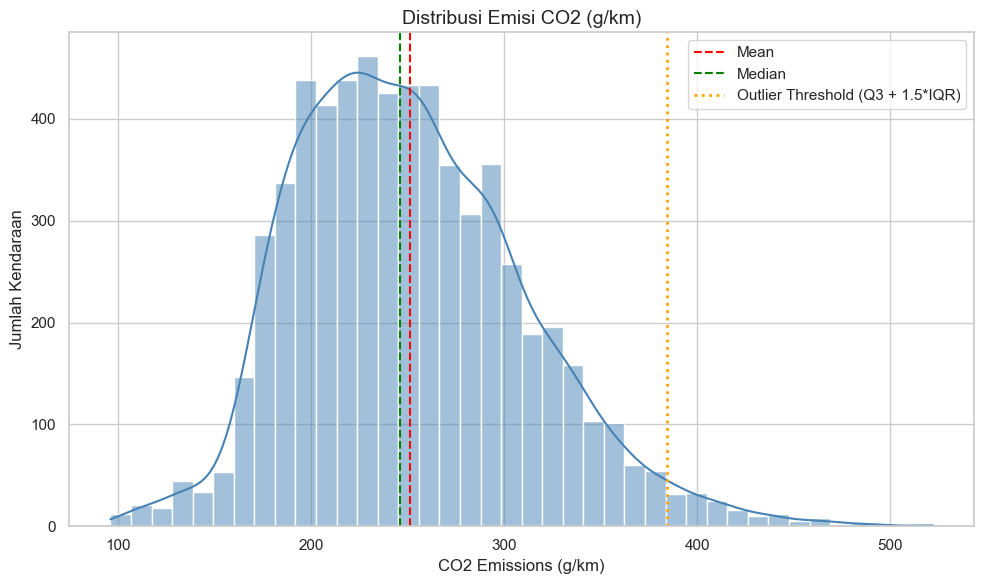

In [16]:
# Visualisasi distribusi CO2 Emissions
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['CO2 Emissions(g/km)'], bins=40, kde=True, color='steelblue')
plt.axvline(df_cleaned['CO2 Emissions(g/km)'].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
plt.axvline(df_cleaned['CO2 Emissions(g/km)'].median(), color='green', linestyle='dashed', linewidth=1.5, label='Median')
plt.axvline(384.5, color='orange', linestyle='dotted', linewidth=2, label='Outlier Threshold (Q3 + 1.5*IQR)')
plt.title('Distribusi Emisi CO2 (g/km)', fontsize=14)
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Jumlah Kendaraan')
plt.legend()
plt.tight_layout()
plt.show()

### Kesimpulan Akhir Analisis 5.1

Distribusi emisi CO₂ kendaraan dalam dataset menunjukkan pola sebaran yang relatif normal dengan sedikit kemiringan ke kanan (positif skew). Visualisasi histogram mendukung hasil statistik deskriptif yang menunjukkan bahwa sebagian besar kendaraan memiliki emisi dalam rentang **208–289 g/km**, dan hanya sebagian kecil (sekitar 1.18%) yang termasuk outlier dengan emisi sangat tinggi (>384.5 g/km).

Garis vertikal pada histogram menunjukkan bahwa:
- Rata-rata emisi kendaraan (**~251 g/km**) sedikit lebih tinggi dari nilai tengah (median), yang mengindikasikan kehadiran nilai-nilai ekstrem di sisi kanan.
- Ambang batas outlier (384.5 g/km) secara visual terlihat memisahkan ekor distribusi, memperkuat potensi klasifikasi kendaraan “beremisi sangat tinggi” untuk dikenai pajak tambahan.

Kesimpulan ini memberikan dasar awal untuk menyusun kebijakan berbasis segmentasi emisi, misalnya pajak kendaraan berlapis (*tiered environmental tax*) berdasarkan kuartil atau outlier.

---

### 5.2 Analisis Korelasi antara `Engine Size` dan `CO₂ Emission`

Visualisasi histogram digunakan untuk melihat distribusi nilai emisi karbon kendaraan dalam dataset. Dengan melihat bentuk distribusi, kita dapat mengidentifikasi sebaran umum, outlier, dan potensi pembagian kelompok kendaraan berdasarkan emisinya.

In [ ]:
# Menganalisis korelasi antara `Engine Size(L)` dengan `CO2 Emissions(g/km)`

correlation = df_cleaned['Engine Size(L)'].corr(df_cleaned['CO2 Emissions(g/km)'])
print(f"Korelasi Pearson antara Engine Size dan CO2 Emissions: {correlation:.2f}")

Korelasi Pearson antara Engine Size dan CO2 Emissions: 0.85


Hasil perhitungan korelasi Pearson menunjukkan bahwa nilai korelasi antara `Engine Size(L)` dan `CO2 Emissions(g/km)` adalah sebesar **0.85**. Ini menunjukkan adanya **hubungan yang sangat kuat dan positif** antara ukuran mesin kendaraan dengan jumlah emisi karbon yang dihasilkan.

Interpretasi:
- Semakin besar ukuran mesin, semakin tinggi emisi CO₂ yang dihasilkan.
- Korelasi ini bersifat linier, sehingga ukuran mesin dapat digunakan sebagai **indikator awal** dalam memprediksi besaran emisi sebuah kendaraan.

Nilai 0.85 berada dalam kategori korelasi yang sangat kuat (*strong positive correlation*), yang mendukung hipotesis awal bahwa performa mesin yang tinggi cenderung menghasilkan emisi yang lebih besar.

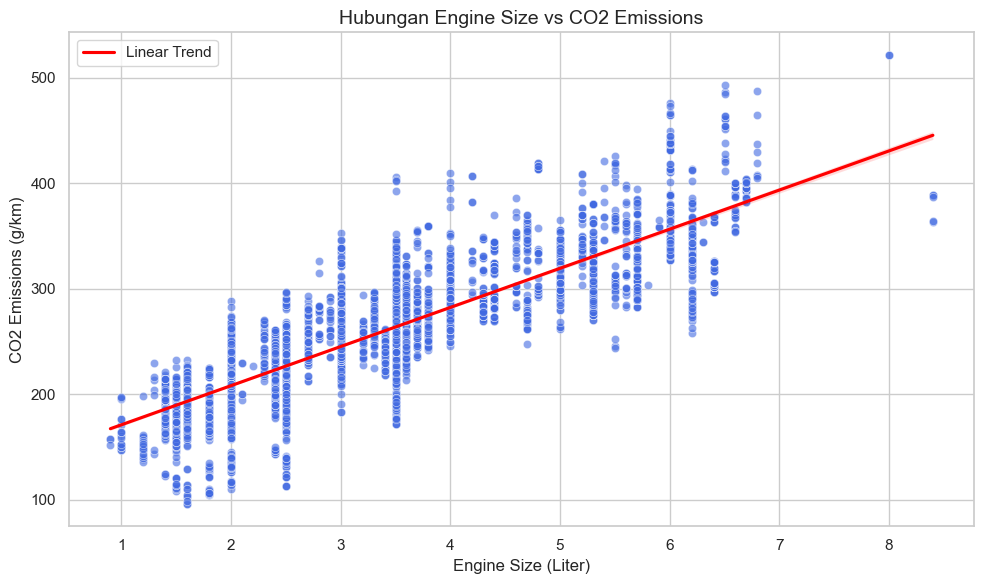

In [15]:
# Scatter plot hubungan antara Engine Size dan CO2 Emissions
plt.figure(figsize=(10,6))
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df_cleaned, alpha=0.6, color='royalblue')
sns.regplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df_cleaned, scatter=False, color='red', label='Linear Trend')
plt.title('Hubungan Engine Size vs CO2 Emissions', fontsize=14)
plt.xlabel('Engine Size (Liter)')
plt.ylabel('CO2 Emissions (g/km)')
plt.legend()
plt.tight_layout()
plt.show()

### Kesimpulan Akhir Analisis 5.2

Visualisasi scatter plot memperkuat hasil korelasi statistik, di mana terlihat pola naik yang konsisten antara ukuran mesin dan emisi CO₂. Trend line merah menunjukkan bahwa secara umum, peningkatan kapasitas mesin berbanding lurus dengan jumlah emisi.

Insight ini mendukung pendekatan kebijakan fiskal berbasis spesifikasi teknis, di mana kendaraan dengan kapasitas mesin besar bisa dikenakan **pajak lingkungan progresif**, karena kontribusinya terhadap emisi lebih besar secara sistematis.

---

### 5.3 Perbandingan `CO₂ Emission` berdasarkan `Fuel Type`

Mencari tahu apakah terdapat perbedaan signifikan dalam rata-rata emisi CO₂ antar jenis bahan bakar (gasoline, diesel, ethanol, natural gas, dsb). Analisis ini penting untuk mendukung rekomendasi kebijakan subsidi atau disinsentif berdasarkan jenis energi yang digunakan.

In [21]:
# Statistik deskriptif per jenis bahan bakar
fuel_stats = df_cleaned.groupby('Fuel Type')['CO2 Emissions(g/km)'].agg(['count', 'mean', 'std']).sort_values(by='mean', ascending=False)
fuel_stats = fuel_stats.rename(columns={
    'count': 'Jumlah Kendaraan',
    'mean': 'Rata-rata Emisi (g/km)',
    'std': 'Standar Deviasi'
})
fuel_stats


,Jumlah Kendaraan,Rata-rata Emisi (g/km),Standar Deviasi
Fuel Type,,,
Ethanol (E85),330,276.048485,48.742211
Premium Gasoline,2765,265.731284,57.643169
Regular Gasoline,3039,235.977953,58.303652
Diesel,147,235.238095,41.911736
Natural Gas,1,213.000000,NaN


Berdasarkan analisis deskriptif terhadap rata-rata emisi CO₂ per jenis bahan bakar:

- **Ethanol (E85)** memiliki **rata-rata emisi tertinggi**, yaitu **276.05 g/km**, namun dengan sebaran yang cukup besar (standar deviasi ~48.74), menunjukkan variasi antar model kendaraan yang menggunakan bahan bakar ini cukup tinggi.
- **Premium Gasoline** menyusul dengan rata-rata emisi sebesar **265.73 g/km**, juga dengan standar deviasi yang cukup besar (~57.64).
- **Regular Gasoline** dan **Diesel** menunjukkan rata-rata emisi yang hampir sama, masing-masing **235.98 g/km** dan **235.24 g/km**, meskipun Regular memiliki populasi kendaraan terbanyak (3.039 unit).
- **Natural Gas** hanya memiliki satu sampel dalam dataset, yaitu 213 g/km, sehingga tidak dapat dianalisis lebih lanjut secara statistik (standar deviasi tidak terdefinisi).

Variasi emisi yang cukup besar antar jenis bahan bakar memberikan indikasi awal bahwa jenis bahan bakar memang memengaruhi tingkat emisi kendaraan, dan mendasari perlunya dilakukan uji ANOVA untuk mengetahui apakah perbedaan ini signifikan secara statistik.

,count,mean,std,min,25%,50%,75%,max
Fuel Type,,,,,,,,
Diesel,147.0,235.238095,41.911736,169.0,198.0,243.0,270.0,326.0
Ethanol (E85),330.0,276.048485,48.742211,128.0,247.0,280.0,300.0,418.0
Natural Gas,1.0,213.000000,NaN,213.0,213.0,213.0,213.0,213.0
Premium Gasoline,2765.0,265.731284,57.643169,122.0,223.0,254.0,301.0,522.0
Regular Gasoline,3039.0,235.977953,58.303652,96.0,192.0,229.0,274.0,488.0


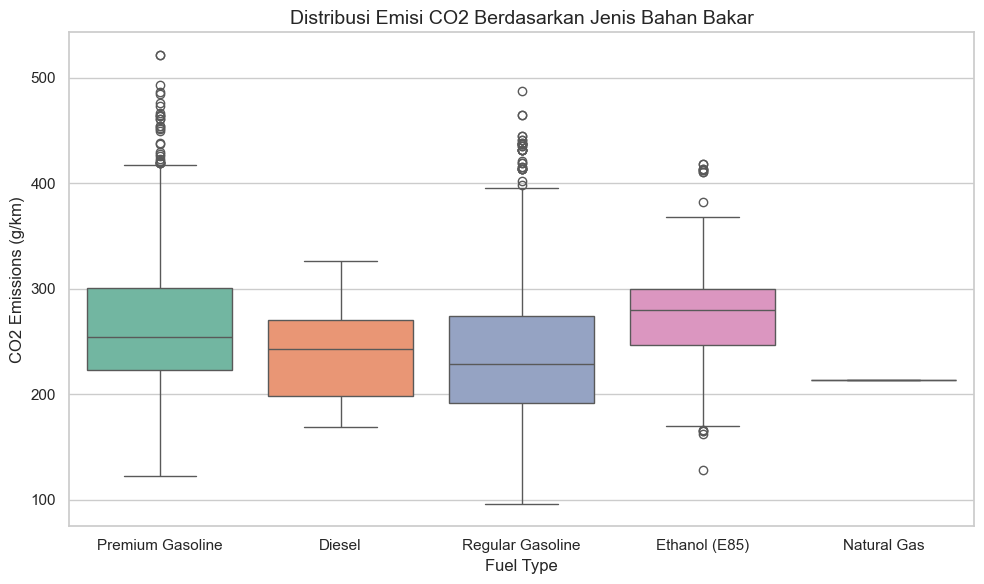

In [32]:
from IPython.display import display

# Menampilkan deskripsi statistik
display(df_cleaned.groupby('Fuel Type')['CO2 Emissions(g/km)'].describe())

# Membuat boxplot
plt.figure(figsize=(10,6))
sns.boxplot(
    x='Fuel Type', 
    y='CO2 Emissions(g/km)', 
    data=df_cleaned, 
    hue='Fuel Type',             # Menghindari warning palette
    palette='Set2', 
    legend=False                 # Menghilangkan duplikasi legend
)
plt.title('Distribusi Emisi CO2 Berdasarkan Jenis Bahan Bakar', fontsize=14)
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.tight_layout()
plt.show()

Analisis statistik deskriptif dan visualisasi boxplot menunjukkan bahwa jenis bahan bakar berpengaruh terhadap besar kecilnya emisi karbon yang dihasilkan oleh kendaraan.

Beberapa temuan penting:

- **Ethanol (E85)** memiliki **rata-rata dan median emisi tertinggi**, dengan nilai tengah (median) sekitar 280 g/km. Sebarannya juga luas, dari 128 hingga 418 g/km.
- **Premium Gasoline** menunjukkan **sebaran yang sangat lebar**, dengan emisi maksimum mencapai **522 g/km**, menjadikannya bahan bakar dengan potensi emisi tertinggi di dataset.
- **Regular Gasoline** dan **Diesel** memiliki **median yang lebih rendah** (~229–243 g/km), dan distribusi yang lebih sempit serta cenderung stabil.
- **Natural Gas** hanya diwakili oleh satu sampel (213 g/km), sehingga tidak bisa dibandingkan secara statistik dan tidak membentuk boxplot.

Secara visual, perbedaan antar kelompok bahan bakar terlihat cukup mencolok. Hal ini memperkuat hipotesis bahwa jenis bahan bakar berkontribusi secara signifikan terhadap emisi CO₂, dan layak untuk diuji lebih lanjut melalui uji statistik ANOVA.

In [33]:
# Mengelompokkan nilai emisi berdasarkan Fuel Type
fuel_groups = [
    group['CO2 Emissions(g/km)'].values
    for fuel, group in df_cleaned.groupby('Fuel Type')
    if len(group) > 1  # Natural Gas hanya 1 data, dikeluarkan
]

# Melakukan uji ANOVA
f_stat, p_val = f_oneway(*fuel_groups)

print(f"Statistik F: {f_stat:.2f}")
print(f"P-value    : {p_val:.4f}")

Statistik F: 155.71
P-value    : 0.0000


### Kesimpulan Akhir Analisis 5.3

Uji ANOVA menunjukkan bahwa perbedaan rata-rata emisi CO₂ antar jenis bahan bakar **sangat signifikan secara statistik**, dengan hasil sebagai berikut:

- **Statistik F**: 155.71
- **P-value**   : < 0.0001

Karena p-value jauh di bawah ambang batas 0.05, maka dapat disimpulkan bahwa **jenis bahan bakar memang memiliki pengaruh nyata terhadap besar kecilnya emisi CO₂ kendaraan**.

Hasil ini memperkuat temuan dari analisis statistik deskriptif dan visualisasi boxplot sebelumnya. Bahan bakar seperti **Ethanol (E85)** dan **Premium Gasoline** terbukti menghasilkan emisi yang lebih tinggi, sedangkan **Regular Gasoline** dan **Diesel** cenderung lebih rendah.

Implikasinya terhadap kebijakan:
- Bahan bakar dengan emisi tinggi dapat dikenakan **disinsentif fiskal** seperti pajak karbon.
- Bahan bakar yang lebih bersih dapat diprioritaskan untuk **subsidi atau insentif** guna mendorong transisi energi yang lebih ramah lingkungan.

Dengan dasar data dan analisis ini, pemerintah atau lembaga terkait dapat menyusun strategi subsidi dan pajak kendaraan yang lebih akurat, adil, dan selaras dengan target pengurangan emisi.

---

Demi mendapatkan insight lebih jauh mengenai kesimpulan di atas, dilakukan analisis tambahan untuk mrlihat rata-rata konsumsi tiap jenis bahan bakar per 100 km.

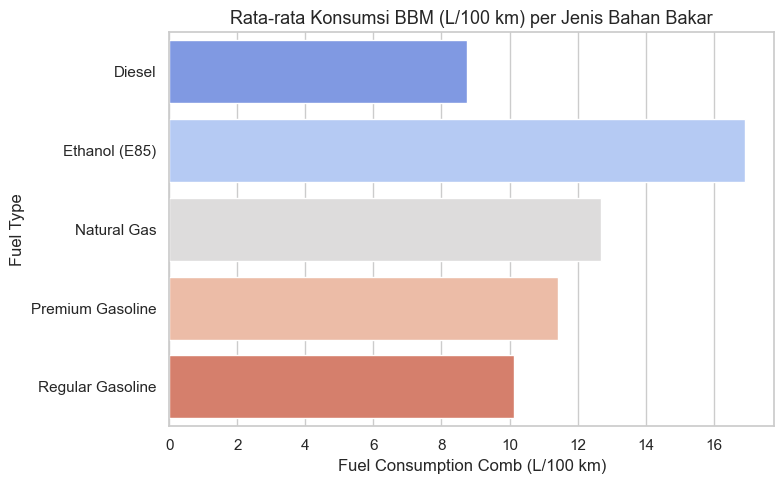

In [ ]:
# Menghitung rata-rata konsumsi BBM per jenis bahan bakar
fuel_efficiency = df_cleaned.groupby('Fuel Type')['Fuel Consumption Comb (L/100 km)'].mean().reset_index()

# Visualisasi bar chart horizontal
plt.figure(figsize=(8,5))
sns.barplot(
    data=fuel_efficiency, 
    y='Fuel Type', 
    x='Fuel Consumption Comb (L/100 km)', 
    hue='Fuel Type', 
    palette='coolwarm', 
    legend=False
)
plt.title('Rata-rata Konsumsi BBM (L/100 km) per Jenis Bahan Bakar', fontsize=13)
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('Fuel Type')
plt.tight_layout()
plt.show()

Melengkapi temuan sebelumnya mengenai emisi CO₂, grafik berikut menunjukkan rata-rata konsumsi bahan bakar (dalam liter per 100 km) untuk tiap jenis bahan bakar.

Urutan dari yang paling boros hingga paling hemat:

1. **Ethanol (E85)** – konsumsi tertinggi
2. **Natural Gas**
3. **Premium Gasoline**
4. **Regular Gasoline**
5. **Diesel** – konsumsi terendah

Hasil ini menambahkan **kesimpulan pendukung** bahwa bahan bakar yang memiliki **emisi tinggi** (seperti Ethanol dan Premium Gasoline) juga cenderung memiliki **tingkat konsumsi energi yang tinggi**, sehingga **tidak hanya membebani lingkungan, tetapi juga berpotensi membebani anggaran subsidi energi** jika digunakan secara luas.

Sebaliknya, **Diesel dan Regular Gasoline** terbukti lebih efisien dalam konsumsi, sekaligus menghasilkan emisi yang lebih rendah dibanding bahan bakar lain.

Dengan demikian, data ini memperkuat urgensi penerapan **kebijakan subsidi dan insentif berbasis efisiensi**, agar dana publik digunakan untuk mendorong penggunaan energi yang lebih hemat dan rendah emisi, bukan sekadar berdasarkan label "teknologi baru" atau "bahan bakar alternatif" atau "bahan bakar premium", dan sebagainya.

---

### 5.4 Analisis Emisi CO₂ Berdasarkan Kelas Kendaraan (`Vehicle Class`)

Mengetahui apakah kelas kendaraan (SUV, Sedan, Pickup, dll.) berpengaruh terhadap besar kecilnya emisi CO₂, serta apakah perbedaan tersebut signifikan secara statistik. Hal ini penting untuk memberikan dasar dalam **kebijakan pajak kendaraan** tahunan atau insentif berbasis kategori kendaraan.

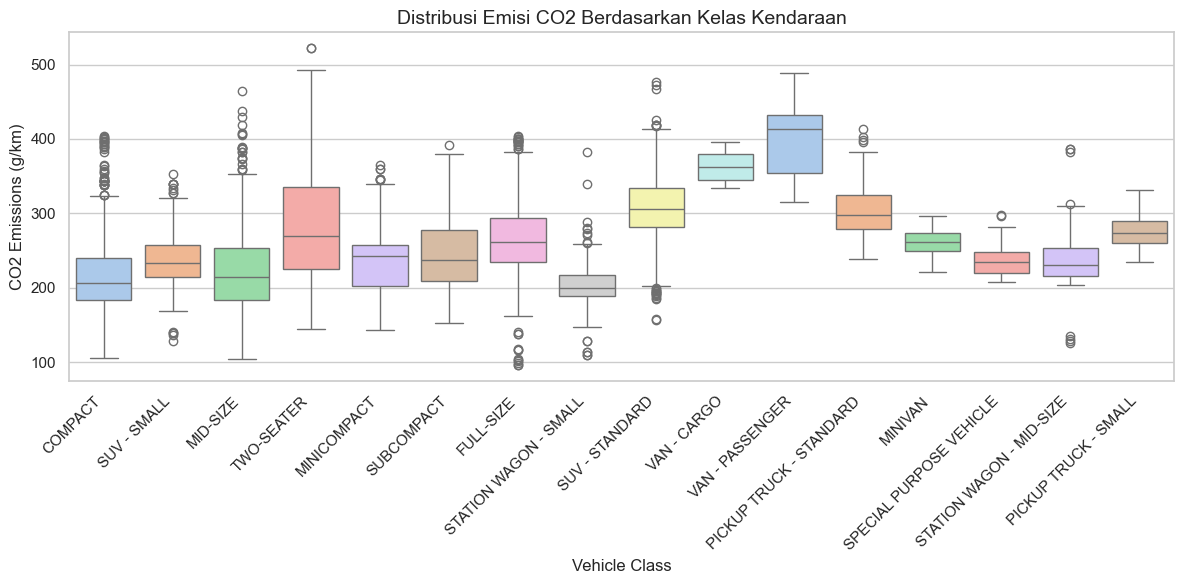

In [ ]:
# Melakukan Visualisasi Distribusi Emisi CO₂ per Kelas Kendaraan
plt.figure(figsize=(12,6))

# Menggunakan hue agar palette tidak warning + matikan legend
sns.boxplot(
    x='Vehicle Class',
    y='CO2 Emissions(g/km)',
    hue='Vehicle Class',  # untuk hindari warning palette
    data=df_cleaned,
    palette='pastel',
    dodge=False,  # agar box tidak terpisah
    legend=False  # matikan legend agar tidak ganda
)

plt.title('Distribusi Emisi CO2 Berdasarkan Kelas Kendaraan', fontsize=14)

# Menggunakan TeX-style CO₂ agar font tidak error
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.xlabel('Vehicle Class', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Statistik deskriptif di atas menunjukkan bahwa emisi CO₂ sangat bervariasi antar kelas kendaraan.

Beberapa temuan penting:

- Kelas kendaraan dengan **rata-rata emisi tertinggi** adalah:
  - **Van - Passenger** (397.21 g/km)
  - **Van - Cargo** (361.50 g/km)
  - **SUV - Standard** (306.73 g/km)
  - **Pickup Truck - Standard** (301.61 g/km)
  - **Two-Seater** (282.09 g/km)

- Kelas dengan **rata-rata emisi terendah** adalah:
  - **Station Wagon - Small** (202.69 g/km)
  - **Compact** (217.64 g/km)
  - **Mid-Size** (222.29 g/km)

- **Two-Seater** menempati posisi cukup tinggi dalam emisi, meskipun ukurannya kecil. Hal ini mungkin disebabkan oleh karakteristik mesinnya yang berperforma tinggi (seperti mobil sport).

- **SUV**, **Pickup**, dan **Van** secara umum menempati kelompok emisi yang tinggi. Hal ini wajar karena dimensi kendaraan yang cenderung besar dan berat, serta didesain untuk membawa muatan atau banyak penumpang.

- Sebaliknya, kendaraan **kecil dan sedang** seperti **Compact**, **Mid-Size**, dan **Station Wagon - Small** menunjukkan efisiensi emisi yang lebih baik.

Distribusi ini mendukung pentingnya mempertimbangkan **kelas kendaraan dalam kebijakan pajak kendaraan bermotor**, karena kontribusinya terhadap emisi berbeda secara signifikan. Selanjutnya, kita akan menguji korelasi antara `CO2 Emissions(g/km)` dengan `Vehicle Class`.

In [ ]:
# Mengelompokkan data CO₂ berdasarkan Vehicle Class
vehicle_groups = [
    group['CO2 Emissions(g/km)'].values
    for _, group in df_cleaned.groupby('Vehicle Class')
]

# Uji ANOVA
f_stat_vclass, p_val_vclass = f_oneway(*vehicle_groups)

print(f"Statistik F: {f_stat_vclass:.2f}")
print(f"P-value    : {p_val_vclass:.4f}")

Statistik F: 236.36
P-value    : 0.0000


Hasil uji ANOVA menunjukkan bahwa perbedaan rata-rata emisi CO₂ antar kelas kendaraan **sangat signifikan secara statistik**, dengan hasil:

- **Statistik F**: 236.36
- **P-value**   : < 0.0001

Karena nilai p-value jauh di bawah ambang 0.05, maka dapat disimpulkan bahwa **kelas kendaraan merupakan faktor yang memengaruhi besar kecilnya emisi CO₂ secara nyata**.

Hal ini memperkuat temuan deskriptif sebelumnya bahwa kendaraan dari kelas seperti **VAN, SUV, dan Pickup Truck** cenderung menghasilkan emisi yang lebih tinggi, sedangkan **Compact, Station Wagon Small, dan Mid-Size** relatif lebih rendah.

Implikasi kebijakan dari hasil ini:

- Pemerintah dapat mempertimbangkan **pajak kendaraan bermotor progresif berbasis kelas**, di mana kelas kendaraan dengan kontribusi emisi tinggi dibebankan tarif lebih besar.
- Sebaliknya, kelas kendaraan yang terbukti lebih ramah lingkungan dapat diberi **pengurangan pajak atau insentif fiskal** untuk mendorong peralihan kendaraan di pasar.

Dengan dasar analisis ini, kebijakan pajak dapat dirancang lebih adil dan selaras dengan target pengurangan emisi karbon.

---

### 5.5 Analisis Emisi CO₂ Berdasarkan Produsen Kendaraan (`Make`)

Mengetahui apakah ada perbedaan pola emisi antar produsen kendaraan. Analisis ini dapat memberikan landasan untuk kebijakan insentif fiskal, seperti:
- Pengurangan pajak untuk produsen dengan rata-rata emisi rendah
- Disinsentif atau kewajiban inovasi teknologi untuk produsen dengan rata-rata emisi tinggi

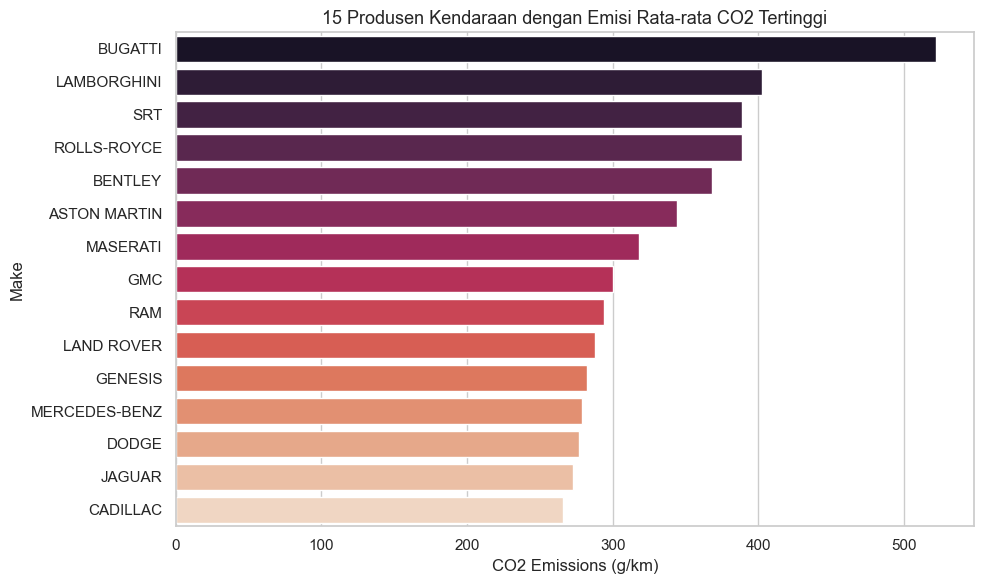

In [ ]:
# Menghitung rata-rata emisi per produsen kendaraan (Make)
make_avg_emission = df_cleaned.groupby('Make')['CO2 Emissions(g/km)'].mean().reset_index()

# Mengmbil 10 produsen dengan rata-rata emisi CO₂ tertinggi
make_top15 = make_avg_emission.sort_values(by='CO2 Emissions(g/km)', ascending=False).head(15)

# Plot bar chart horizontal dengan hue agar tidak muncul warning
plt.figure(figsize=(10,6))
sns.barplot(
    data=make_top15,
    x='CO2 Emissions(g/km)',
    y='Make',
    hue='Make',
    palette='rocket',
    legend=False
)
plt.title('15 Produsen Kendaraan dengan Emisi Rata-rata CO2 Tertinggi', fontsize=13)
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Make')
plt.tight_layout()
plt.show()


Dapat dilihat bahwa **15 produsen dengan rata-rata emisi CO₂ tertinggi** didominasi oleh merek kendaraan mewah dan performa tinggi, seperti:
- **Bugatti (522 g/km)**
- **Lamborghini (402.27 g/km)**
- **SRT, Rolls-Royce, Bentley, Aston Martin**
- Termasuk juga merek seperti **GMC, RAM, Land Rover**, dan **Mercedes-Benz**

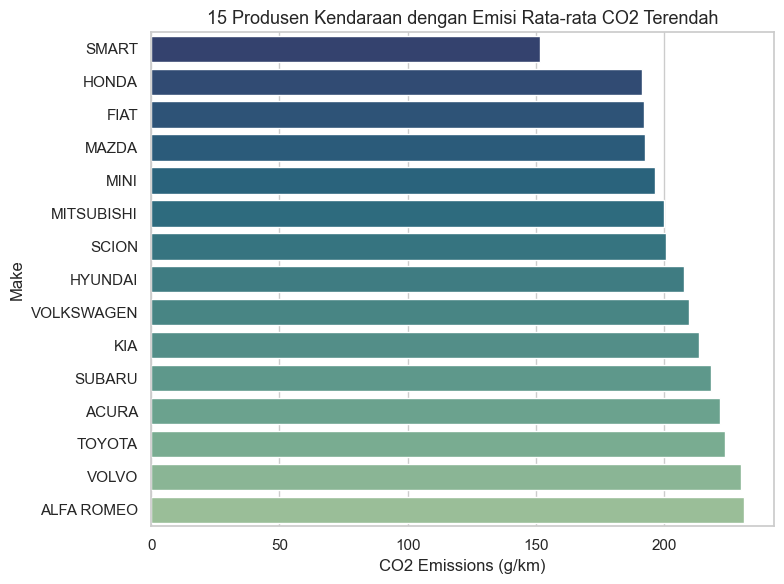

In [ ]:
# Mengambil 10 produsen dengan rata-rata emisi CO₂ terendah
make_bottom15 = make_avg_emission.sort_values(by='CO2 Emissions(g/km)', ascending=True).head(15)

# Visualisasi bar chart horizontal (tanpa warning)
plt.figure(figsize=(8,6))
sns.barplot(
    data=make_bottom15,
    x='CO2 Emissions(g/km)',
    y='Make',
    hue='Make',
    palette='crest_r',
    legend=False
)
plt.title('15 Produsen Kendaraan dengan Emisi Rata-rata CO2 Terendah', fontsize=13)
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

Sementara itu, diapat disimpulkan bahwa **15 produsen dengan rata-rata emisi CO₂ terendah** didominasi oleh merek *mass-market* yang dikenal lebih efisien, seperti:
- **Smart (151.43 g/km)**
- **Honda, Mazda, Fiat, Mini, Mitsubishi, Hyundai, Toyota, Volkswagen, dan Kia**

In [ ]:
# Menghitung rata-rata emisi per Make
make_avg_emission = df_cleaned.groupby('Make')['CO2 Emissions(g/km)'].mean().reset_index()

# Top 15 tertinggi
top15 = make_avg_emission.sort_values(by='CO2 Emissions(g/km)', ascending=False).head(15)

# Top 15 terendah
bottom15 = make_avg_emission.sort_values(by='CO2 Emissions(g/km)', ascending=True).head(15)

# Mencetak daftar top 15 tertinggi
print("15 Produsen dengan Emisi CO₂ Tertinggi:")
for i, row in top15.iterrows():
    print(f"{row['Make']}: {row['CO2 Emissions(g/km)']:.2f} g/km")

print("\n15 Produsen dengan Emisi CO₂ Terendah:")
for i, row in bottom15.iterrows():
    print(f"{row['Make']}: {row['CO2 Emissions(g/km)']:.2f} g/km")


15 Produsen dengan Emisi CO₂ Tertinggi:
BUGATTI: 522.00 g/km
LAMBORGHINI: 402.27 g/km
SRT: 389.00 g/km
ROLLS-ROYCE: 388.75 g/km
BENTLEY: 367.91 g/km
ASTON MARTIN: 344.28 g/km
MASERATI: 318.13 g/km
GMC: 300.53 g/km
RAM: 294.18 g/km
LAND ROVER: 288.08 g/km
GENESIS: 282.57 g/km
MERCEDES-BENZ: 278.72 g/km
DODGE: 277.09 g/km
JAGUAR: 273.08 g/km
CADILLAC: 266.14 g/km

15 Produsen dengan Emisi CO₂ Terendah:
SMART: 151.43 g/km
HONDA: 191.26 g/km
FIAT: 192.29 g/km
MAZDA: 192.76 g/km
MINI: 196.57 g/km
MITSUBISHI: 200.10 g/km
SCION: 200.81 g/km
HYUNDAI: 207.93 g/km
VOLKSWAGEN: 209.84 g/km
KIA: 213.80 g/km
SUBARU: 218.12 g/km
ACURA: 221.67 g/km
TOYOTA: 223.93 g/km
VOLVO: 229.95 g/km
ALFA ROMEO: 231.32 g/km


### Kesimpulan Analisis Emisi CO₂ Berdasarkan Produsen Kendaraan

Analisis rata-rata emisi CO₂ berdasarkan merek kendaraan menunjukkan adanya perbedaan yang cukup tajam antar produsen. Analisis lebih lanjut dengan data yang lebih lengkap mungkin akan menunjukkan hubungan yang lebih jelas antara merk kendaraan dengan segmentasi konsumen, kelas dan fungsi kendaraan, dan lain sebagainya, sehingga bisa dijadikan *insight* tambahan dari saran terhadap kebijakan pajak dan subsidi di bawah ini:

- **Merek dengan rata-rata emisi tinggi** dapat dikenakan **beban fiskal tambahan**, seperti:
  - Pajak tambahan untuk kendaraan baru
  - Kewajiban pengembangan kendaraan ramah lingkungan
  - Batasan emisi dalam perizinan atau ekspor

- Sebaliknya, **produsen dengan emisi rendah** dapat diberikan:
  - **Insentif fiskal**
  - Pengurangan bea masuk komponen hijau
  - Peringkat "*green manufacturer*" untuk branding internasional

Temuan ini mendukung pendekatan kebijakan berbasis data, dengan mendorong produsen untuk:
1. Mengembangkan teknologi efisiensi energi,
2. Berkompetisi dalam inovasi rendah karbon,
3. Dan memenuhi standar transisi energi nasional maupun global.

Dengan insentif dan disinsentif berbasis performa emisi, negara dapat menekan emisi sektor transportasi tanpa mengorbankan dinamika pasar otomotif.

---
=================================================

## 6. *Conclusion*

Berdasarkan eksplorasi data terhadap lebih dari 7.000 kendaraan dari berbagai jenis bahan bakar, kelas kendaraan, ukuran mesin, dan produsen, ditemukan beberapa insight penting yang relevan untuk mendukung pengambilan keputusan fiskal dan lingkungan:

1. **Tingkat Emisi CO₂ sangat dipengaruhi oleh ukuran mesin kendaraan.**
   Hasil analisis korelasi menunjukkan bahwa semakin besar ukuran mesin, semakin tinggi emisi CO₂ yang dihasilkan.

2. **Jenis bahan bakar memberikan dampak signifikan terhadap emisi CO₂.**
   Berdasarkan uji ANOVA, perbedaan rata-rata emisi antar jenis bahan bakar (*Gasoline, Diesel, Ethanol*, dsb.) terbukti signifikan secara statistik. Bahan bakar seperti *Ethanol* dan *Premium Gasoline* tercatat memiliki konsumsi dan emisi tertinggi, sedangkan *Diesel* dan *Natural Gas* relatif lebih efisien.

3. **Kelas kendaraan berkontribusi besar terhadap tingkat emisi.**
   *SUV , *van*, dan *pickup truck standar* termasuk kelompok dengan rata-rata emisi tertinggi. Sebaliknya, *compact*, *station wagon kecil*, dan *mid-size* tergolong rendah emisi. Hasil uji ANOVA mendukung kesimpulan ini secara statistik.

4. **Rata-rata emisi CO₂ berbeda cukup tajam antar produsen kendaraan.**
   Produsen kendaraan mewah dan sport seperti *Bugatti*, *Lamborghini*, dan *Rolls-Royce* memiliki emisi tertinggi, sedangkan merek yang lebih konvensional seperti *Smart*, *Honda*, dan *Toyota* memiliki emisi rata-rata paling rendah. Hal ini membuka ruang bagi kebijakan fiskal berbasis performa emisi masing-masing merek.

5. **Konsumsi bahan bakar memiliki keterkaitan kuat dengan emisi CO₂.**
   Bahan bakar yang lebih boros cenderung menghasilkan emisi yang lebih tinggi, sehingga kebijakan subsidi energi sebaiknya mempertimbangkan efisiensi konsumsi dan dampak lingkungan secara bersamaan.

---

### Rangkuman Saran Kebijakan:

Analisis ini mendukung pentingnya penerapan kebijakan fiskal berbasis data dalam sektor transportasi. Beberapa rekomendasi yang dapat dipertimbangkan adalah:

- **Subsidi energi selektif**, hanya untuk bahan bakar yang efisien dan rendah emisi.
- **Pajak kendaraan progresif**, berdasarkan kelas kendaraan dan emisi rata-rata.
- **Insentif fiskal bagi produsen** dengan performa emisi rendah.
- **Pengenaan beban tambahan** bagi merek atau kategori kendaraan yang konsisten menghasilkan emisi tinggi.

Dengan kebijakan yang lebih akurat dan adil berbasis data teknis kendaraan, negara dapat mengurangi pemborosan anggaran, menekan emisi karbon, serta memperkuat posisi dalam mengakses pendanaan transisi energi global.

---
---
---

